# Data cleaning

In [ ]:
# import independesis 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


: 

In [ ]:
#read csv file and make copy of it 
df = pd.read_csv('train1121.csv')
df_original = df.copy()

In [21]:
# show first 5 rows 
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Utilities,Neighborhood,Condition2,BldgType,HouseStyle,...,Functional,Fireplaces,GarageType,GarageCars,GarageArea,PavedDrive,PoolArea,Fence,YrSold,SalePrice
0,0,30,RL,64.0,4219,AllPub,BrkSide,Norm,1Fam,1Story,...,Maj2,0,NaN,0.0,27.0,N,0,NaN,2008,52169.825918
1,1,20,RL,88.0,12089,AllPub,ClearCr,Norm,1Fam,1Story,...,Typ,1,Attchd,2.0,549.0,Y,0,NaN,2006,156971.362605
2,2,20,RL,NaN,8588,AllPub,Sawyer,Norm,1Fam,1Story,...,Typ,0,Detchd,2.0,759.0,Y,0,NaN,2009,123374.496628
3,3,60,FV,73.0,8214,AllPub,Somerst,Norm,1Fam,2Story,...,Typ,0,Attchd,2.0,641.0,Y,0,NaN,2006,197036.951904
4,4,50,RL,66.0,8499,AllPub,Edwards,Norm,1Fam,1.5Fin,...,Typ,0,NaN,0.0,27.0,N,0,NaN,2006,81062.330378


In [ ]:
# how many rows and coulmns we have
df.shape

(1500, 31)

In [ ]:
# Check missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0] 
 # Keep only columns with missing values

# Convert to percentage for better understanding
missing_percentage = (missing_values / len(df)) * 100


In [24]:
# Create a DataFrame to show missing values in a sorted order
missing_df = pd.DataFrame({"Missing Values": missing_values, "% Missing": missing_percentage})
missing_df = missing_df.sort_values(by="% Missing", ascending=False)

In [25]:
# Display the missing values summary
print(missing_df)

              Missing Values  % Missing
Fence                   1217  81.133333
LotFrontage              264  17.600000
GarageType                87   5.800000
BsmtExposure              37   2.466667
MSZoning                   3   0.200000
Utilities                  2   0.133333
Functional                 2   0.133333
Electrical                 1   0.066667
BsmtFullBath               1   0.066667
BsmtHalfBath               1   0.066667


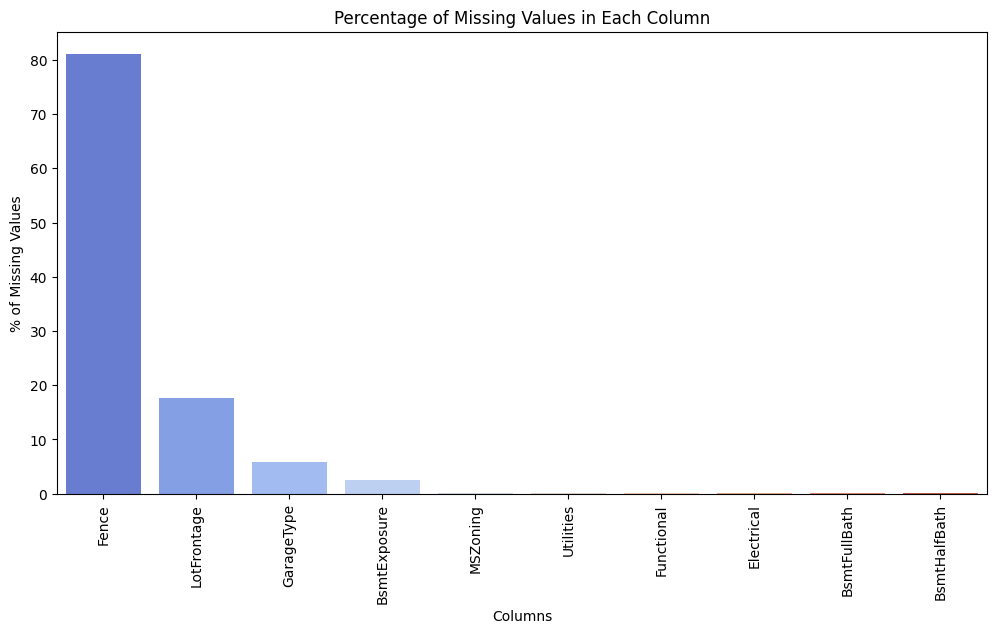

In [27]:
# Plot missing values
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_df.index, y=missing_df["% Missing"], hue=missing_df.index, legend=False, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("% of Missing Values")
plt.title("Percentage of Missing Values in Each Column")
plt.show()

Remaining missing values:
MSZoning           3
LotFrontage      264
Utilities          2
BsmtExposure      37
Electrical         1
BsmtFullBath       1
BsmtHalfBath       1
Functional         2
GarageType        87
Fence           1217
dtype: int64


C:\Users\Dell\AppData\Local\Temp\ipykernel_22932\1279003953.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette="coolwarm")


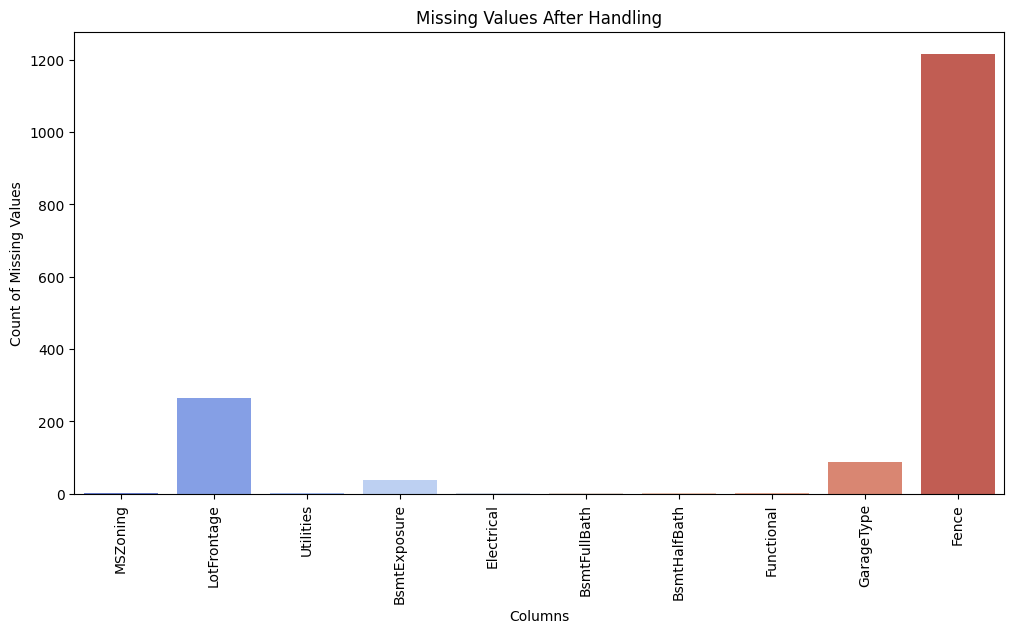

In [32]:
# Display the missing values summary
if missing_values.empty:
    print("No missing values left!")
else:
    print("Remaining missing values:")
    print(missing_values)
# Plot missing values
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Count of Missing Values")
plt.title("Missing Values After Handling")
plt.show()


In [33]:
# Relationship between GrLivArea (Above ground living area) and SalePrice
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["GrLivArea"], y=df["SalePrice"], alpha=0.5)
plt.xlabel("Above Ground Living Area (sq ft)")
plt.ylabel("Sale Price")
plt.title("Living Area vs Sale Price")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


KeyError: 'GrLivArea'

<Figure size 1000x500 with 0 Axes>

# ** EDA process **

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
# figure size in inches 
plt.figure(figsize=(8,5))

In [ ]:
# draw the histogram 
sns.histplot(df['SalePrice'], bins=30 , kde=True)


In [ ]:
# more accurete by log 
df['SalePrice'] = np.log1p(df['SalePrice'])
# draw the hestogram again and see the differnce
sns.histplot(df['SalePrice'] , bins = 30 , kde=True)

In [ ]:
Q1 = df['SalePrice'].quantile(0.25)  # الربع الأول
Q3 = df['SalePrice'].quantile(0.75)  # الربع الثالث
IQR = Q3 - Q1  # المدى الربيعي

# تحديد الحد الأدنى والحد الأقصى للقيم العادية
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# معرفة عدد القيم الشاذة
outliers = df[(df['SalePrice'] < lower_bound) | (df['SalePrice'] > upper_bound)]
print(f"عدد القيم الشاذة: {len(outliers)}")

In [ ]:
df_cleaned = df[(df['SalePrice'] >= lower_bound) & (df['SalePrice'] <= upper_bound)]
print(f"عدد البيانات بعد الحذف: {df_cleaned.shape[0]}")

In [ ]:
df['SalePrice'] = np.log1p(df['SalePrice'])
# draw the hestogram again and see the differnce
sns.histplot(df['SalePrice'] , bins = 30 , kde=True)

In [ ]:
df =df_original.copy()
print(df.info())


In [ ]:
print(df.info())  # تأكد إن البيانات رجعت

relation salesPrice &  other var 